RandomForest R²: 0.9759266567447397
RandomForest RMSE: 3.9694444475691437


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_10904\3624406674.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="crest")


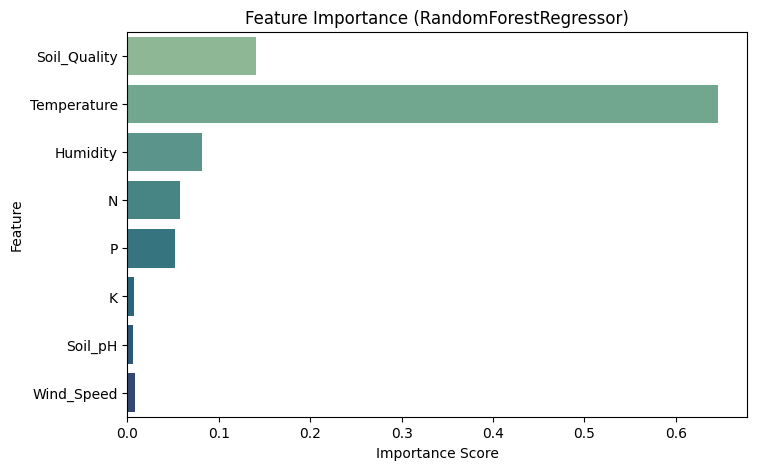

GradientBoosting R²: 0.972
GradientBoosting RMSE: 4.275


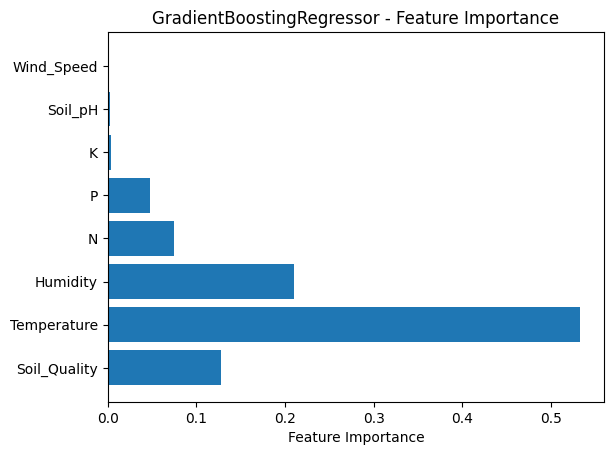

        Feature  GBR_Importance
1   Temperature        0.532945
2      Humidity        0.210253
0  Soil_Quality        0.127488
3             N        0.074924
4             P        0.047775
5             K        0.003319
6       Soil_pH        0.002548
7    Wind_Speed        0.000746
        Feature  GBR_Importance  RF_Importance
1   Temperature        0.532945       0.645942
2      Humidity        0.210253       0.082056
0  Soil_Quality        0.127488       0.140529
3             N        0.074924       0.057319
4             P        0.047775       0.052368
5             K        0.003319       0.006836
6       Soil_pH        0.002548       0.006499
7    Wind_Speed        0.000746       0.008450


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


ds = pd.read_csv("crop_yield_dataset.csv")
ds["Date"] = pd.to_datetime(ds["Date"])
ds["Year"] = ds["Date"].dt.year
ds["Month"] = ds["Date"].dt.month

crops = ["Tomato", "Wheat", "Corn", "Rice", "Barley", "Soybean", "Cotton", "Sugarcane", "Potato", "Sunflower"]

# ----------------------------------------------------------------------------
# Dataset Selection
# ----------------------------------------------------------------------------

# Select features (from EDA results)
X = ds[["Soil_Quality", "Temperature", "Humidity", "N", "P", "K", "Soil_pH", "Wind_Speed"]]
y = ds["Crop_Yield"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# --------------------------------------------------------------------------
# GBR
# --------------------------------------------------------------------------
# Very similar to RandomForest. Think of GBR as a more “focused” learner that tries to correct its own mistakes step by step.

# Initialize model
gbr = GradientBoostingRegressor(
    n_estimators=200,     # number of boosting stages (like trees)
    learning_rate=0.1,    # how much each tree contributes
    max_depth=5,          # depth of each tree
    random_state=36
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"GradientBoosting R²: {r2:.3f}")
print(f"GradientBoosting RMSE: {rmse:.3f}")


importances = gbr.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("GradientBoostingRegressor - Feature Importance")
plt.show()

